In [24]:
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
path = '/archive/Katherine.Turner/xanadu_mom6_20220703/CM4_piControl_C_restartyear148/gfdl.ncrc5-intel22-prod-openmp/pp/'

In [3]:
path_slp = 'atmos/ts/monthly/5yr/*.slp.nc'
ds = xr.open_mfdataset(path+path_slp, use_cftime=True)

In [6]:
slp_40 = ds.slp.sel(lat=-40, method='nearest').mean(dim='lon') 
slp_65 = ds.slp.sel(lat=-65, method='nearest').mean(dim='lon')

In [23]:
dslp_40 = slp_40.groupby(ds.time.dt.month) - slp_40.groupby(ds.time.dt.month).mean('time')
nslp_40 = dslp_40.groupby(ds.time.dt.month) / slp_40.groupby(ds.time.dt.month).std('time')

dslp_65 = slp_65.groupby(ds.time.dt.month) - slp_65.groupby(ds.time.dt.month).mean('time')
nslp_65 = dslp_65.groupby(ds.time.dt.month) / slp_65.groupby(ds.time.dt.month).std('time')

/nbhome/Katherine.Turner/miniconda3/envs/py310/lib/python3.10/site-packages/xarray/core/indexing.py:1384: PerformanceWarning: Slicing with an out-of-order index is generating 95 times more chunks
  return self.array[key]
/nbhome/Katherine.Turner/miniconda3/envs/py310/lib/python3.10/site-packages/xarray/core/indexing.py:1384: PerformanceWarning: Slicing with an out-of-order index is generating 95 times more chunks
  return self.array[key]
/nbhome/Katherine.Turner/miniconda3/envs/py310/lib/python3.10/site-packages/xarray/core/indexing.py:1384: PerformanceWarning: Slicing with an out-of-order index is generating 95 times more chunks
  return self.array[key]
/nbhome/Katherine.Turner/miniconda3/envs/py310/lib/python3.10/site-packages/xarray/core/indexing.py:1384: PerformanceWarning: Slicing with an out-of-order index is generating 95 times more chunks
  return self.array[key]


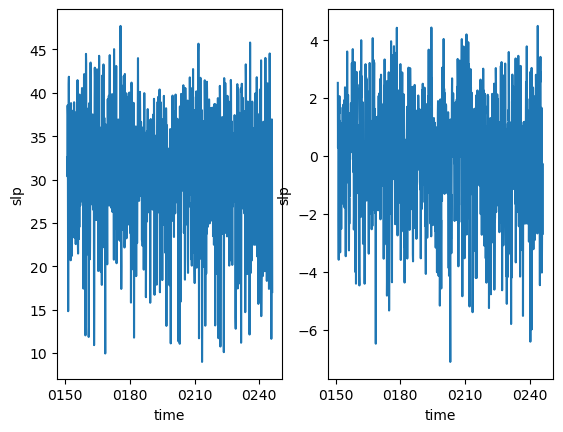

In [25]:
fig, axs = plt.subplots(ncols=2)

(slp_40 - slp_65).plot(ax=axs[0])
(nslp_40 - nslp_65).plot(ax=axs[1])

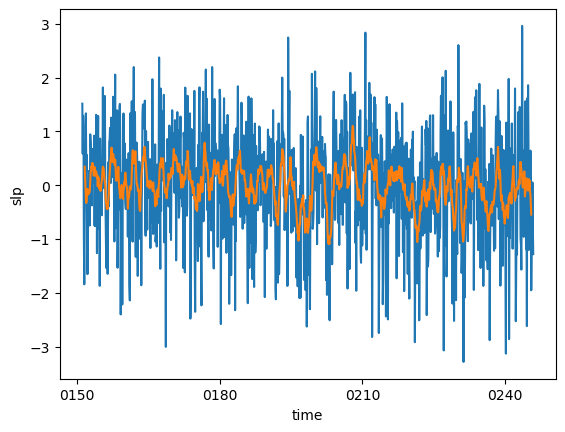

In [26]:
nslp_40.plot()
nslp_40.rolling(time=12, center=True).mean().plot()

In [ ]:
t

In [38]:
SAM_ann = nslp_40.rolling(time=6, center=True).mean()[6::12]
t = SAM_ann.load()
t

<xarray.DataArray 'slp' (time: 95)>
array([-0.23701842,  0.00240278,  0.29174027, -0.1358211 ,  0.5618964 ,
       -0.28230512,  0.50150913, -0.29905784, -0.19821839, -0.0793236 ,
        0.24412857, -0.09189145, -0.3304954 , -0.32029474, -0.31060663,
       -0.61515397,  0.12594046, -0.70805746, -0.03847312,  0.6735677 ,
        0.1942203 ,  0.02570309,  0.732001  ,  0.15566605,  0.24350232,
        0.4779595 , -0.28614467,  0.0868814 , -0.02222596, -0.03745044,
        0.1401952 , -0.4092984 ,  0.36881208,  0.5175519 ,  0.2555252 ,
        0.5402925 , -0.09177963,  0.3944424 , -0.09865037,  0.35319397,
       -0.34695485, -0.3765366 ,  0.2284956 ,  0.76763207,  0.02941596,
       -1.067268  , -0.24273376, -0.44140947,  0.00152971,  0.6518437 ,
        0.37374607, -0.9346115 , -0.80957675,  0.37409332,  0.29346597,
        0.6835198 ,  0.49785352,  0.15321358, -0.08287152,  0.60302645,
        0.9972512 ,  0.7029477 , -0.6438393 , -0.7163606 , -0.11589396,
        0.19387384,  0.22761367,  0.16668232, -0.17973755,  0.09612038,
       -0.71431905,  0.05350985,  0.06084003,  0.11303857, -0.39745024,
        0.29847026, -0.0770153 ,  0.5478864 , -0.96170074,  0.20168029,
       -1.1420122 ,  0.16917954,  0.2648837 ,  0.2504634 , -0.07927293,
       -0.43405092, -0.38655892,  0.54614955, -0.06399446,  0.04802043,
        0.13101469, -1.0200605 , -0.02987647, -0.21439825, -0.5446065 ],
      dtype=float32)
Coordinates:
    lat      (time) float64 -39.5 -39.5 -39.5 -39.5 ... -39.5 -39.5 -39.5 -39.5
  * time     (time) object 0151-07-16 12:00:00 ... 0245-07-16 12:00:00
    month    (time) int64 7 7 7 7 7 7 7 7 7 7 7 7 7 ... 7 7 7 7 7 7 7 7 7 7 7 7

(-30.0, -90.0)

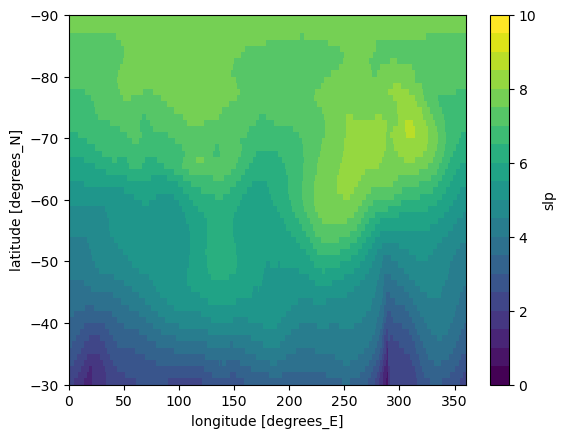

In [45]:
idx = (ds.time.dt.season == 'JJA')
ds.slp[idx,:,:].std(dim='time').plot(cmap=plt.get_cmap('viridis', 20), vmin=0, vmax=10, extend='neither')
plt.ylim([-30,-90])